# Day 10: Neural Networks

### BUSI 520 - Python for Business Research
### Kerry Back, JGSB, Rice University

### Multi-layer perceptrons

* A multi-layer perceptron (MLP) consists of "neurons" arranged in layers.
* A neuron is a mathematical function.  It takes inputs $x_1, \ldots, x_n$, calculates a function $y=f(x_1, \ldots, x_n)$ and passes $y$ to the neurons in the next level.
  * The inputs in the first layer are the features.
  * The inputs in successive layers are the calculations from the prior level. 
* The last layer is a single neuron that produces the output.
* "Input layer" doesn't do anything. "Output layer" is last layer.  Others are called "hidden layers."


### Illustration

![](images/Neural-Nets-Transparent.png)

- inputs $x_1, x_2, x_3, x_4$
- variables $y_1, \ldots, y_5$  are calculated in hidden layer
- output depends on $y_1, \ldots, y_5$

### Rectified linear units

- The usual function for the neurons (except in the last layer) is 

$$ y = \max(0,b+w_1x_1 + \cdots + w_nx_n)$$

- Parameters $b$ (called bias) and $w_1, \ldots w_n$ (called weights) are different for different neurons. 
- This function is called a rectified linear unit (RLU).  
- Analogous to neurons firing in brain:
  - $y>0$ only when $\sum w_ix_i$ is large enough. 
  - A neuron  fires when it is sufficiently stimulated by signals from other neurons.

### Output neuron

- The output doesn't have a truncation.
- For regression problems, it is linear:

$$z = b+w_1y_1 + \cdots + w_ny_n$$ 

- For classification, there is a linear function for each class and predicted probabilities are (called softmax):
$$ \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}}$$ 

### Deep versus shallow learning

- Deep learning means a neural network with  many layers.  It is behind facial recognition, self-driving cars, ...
- Giu, Kelley & Xiu: shallow learning seems to work better for predicting stock returns
- Probably due to low signal to noise ratio


### Neural net libraries

* Sci-kit learn (for small problems, CPU)
* Tensorflow from Google (CPU or GPU)
* Torch from Facebook (pytorch = python version, CPU or GPU)
* cuml from Nvidia (for GPU)

![](neuralnet.png)

### Example

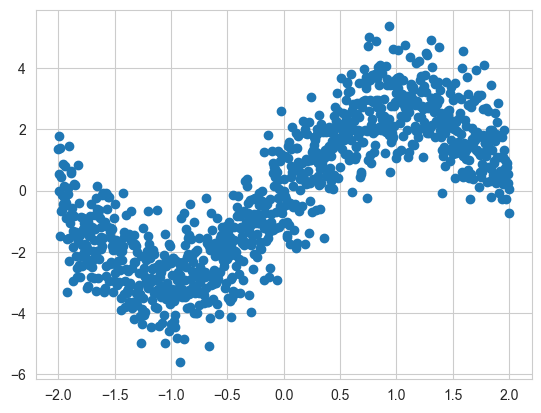

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("whitegrid")

# some artificial data

np.random.seed(0)
size = 1000

x = np.linspace(-2, 2, size)
y = 2.9 * np.sin(1.5 * x) + np.random.normal(size=size)

# view data
plt.scatter(x, y)
plt.show()

### Split into train and test

In [8]:
from sklearn.model_selection import train_test_split

X = x.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

### Scale the x variables

- With only one x variable, this doesn't matter.
- But MLPRegressor uses L2 regularization by default.  This is sensitive to the scale of the x variables.
- So, in general, we scale the x variables.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Define a model and train

In [10]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(
  hidden_layer_sizes=(16, 8, 4),
  random_state=0,
  max_iter=2000
)
model.fit(X_train_scaled, y_train)
print(f"R-squared on test data is {model.score(X_test_scaled, y_test)}")

R-squared on test data is 0.8322573476968619


### View

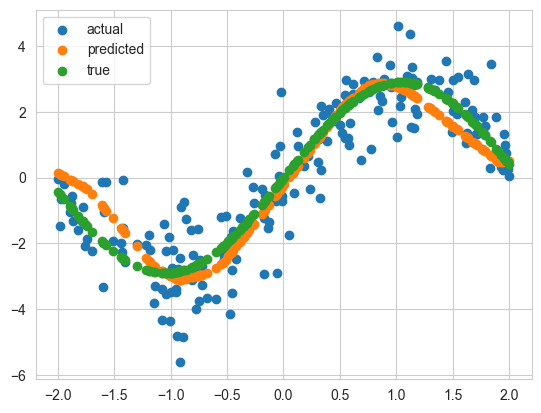

In [11]:
# actual y's
plt.scatter(X_test, y_test, label="actual")

# predicted y's
y_hat = model.predict(X_test)
plt.scatter(X_test, y_hat, label="predicted")

# true y's (without noise)
y_true = 2.9 * np.sin(1.5 * X_test)
plt.scatter(X_test, y_true, label="true")

plt.legend()
plt.show()

### Nonparametric estimation

- We got a similar good fit using nonlinear least squares in the last class.
- But, then we input the correct functional form $a\cdot \sin(bx)$ and only had to estimate $a$ and $b$.
- Here, we input no functional form and let the neural net figure it out.

### Compare different network configurations

In [12]:
import pandas as pd  

networks = [
    (4,),
    (8,),
    (16,),
    (32,),
    (64,),
    (8, 4),
    (16, 8, 4),
    (32, 16, 8, 4),
    (64, 32, 16, 8, 4),
]

dct = {}
for n in networks:
    model = MLPRegressor(
        hidden_layer_sizes=n, random_state=0, max_iter=2000
    )
    model.fit(X_train, y_train)
    dct[n] = model.score(X_test, y_test)
print(pd.Series(dct))

4     0.791647
8     0.828308
16    0.832089
32    0.833226
64    0.832105
8     0.803791
16    0.832003
32    0.794628
64    0.832195
dtype: float64


### Ask Julius 

- to get the California house price data and 
  - split into train, validate, and test
  - fit an MLP regressor with different network structures on the training data and compute R2's on the validation data
  - fit the best model on the training and validation data and compute R2 on the test data
- to repeat with an MLP classifier on the breast cancer data 
  - use accuracy instead of R2 to select the best model
  - compute the confusion matrix on the test data 
